In [8]:
pip install ucimlrepo

In [7]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
default_of_credit_card_clients = fetch_ucirepo(id=350)

# data (as pandas dataframes)
X = default_of_credit_card_clients.data.features
y = default_of_credit_card_clients.data.targets

# metadata
print(default_of_credit_card_clients.metadata)

# variable information
print(default_of_credit_card_clients.variables)


{'uci_id': 350, 'name': 'Default of Credit Card Clients', 'repository_url': 'https://archive.ics.uci.edu/dataset/350/default+of+credit+card+clients', 'data_url': 'https://archive.ics.uci.edu/static/public/350/data.csv', 'abstract': "This research aimed at the case of customers' default payments in Taiwan and compares the predictive accuracy of probability of default among six data mining methods.", 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 30000, 'num_features': 23, 'feature_types': ['Integer', 'Real'], 'demographics': ['Sex', 'Education Level', 'Marital Status', 'Age'], 'target_col': ['Y'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Fri Mar 29 2024', 'dataset_doi': '10.24432/C55S3H', 'creators': ['I-Cheng Yeh'], 'intro_paper': {'ID': 365, 'type': 'NATIVE', 'title': 'The comparisons of data mining techniques for the predictive accuracy of 

✅ Données chargées avec succès : (30000, 25) observations



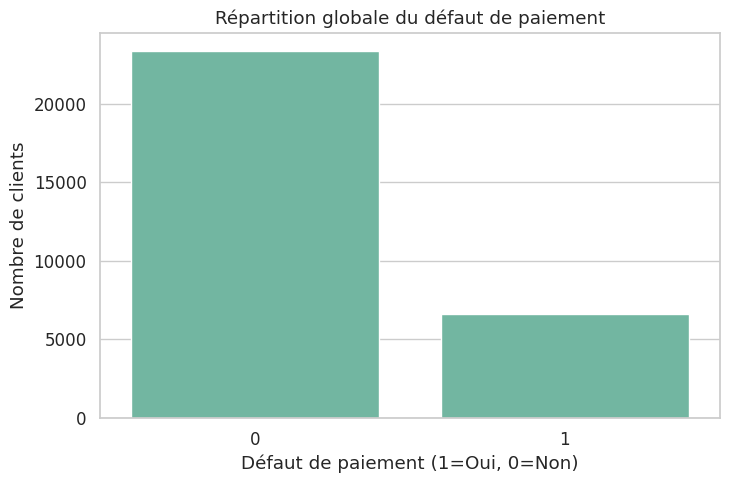

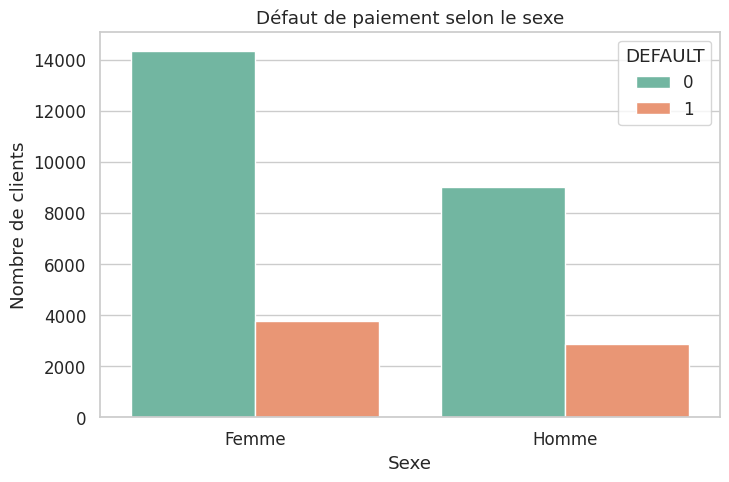

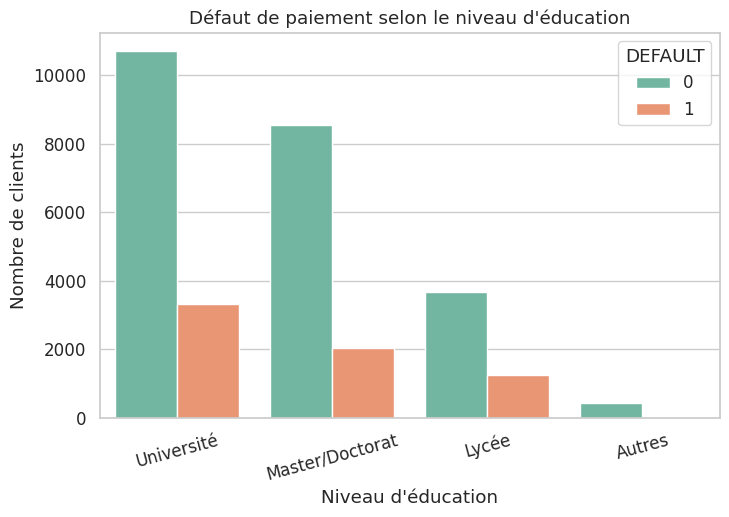

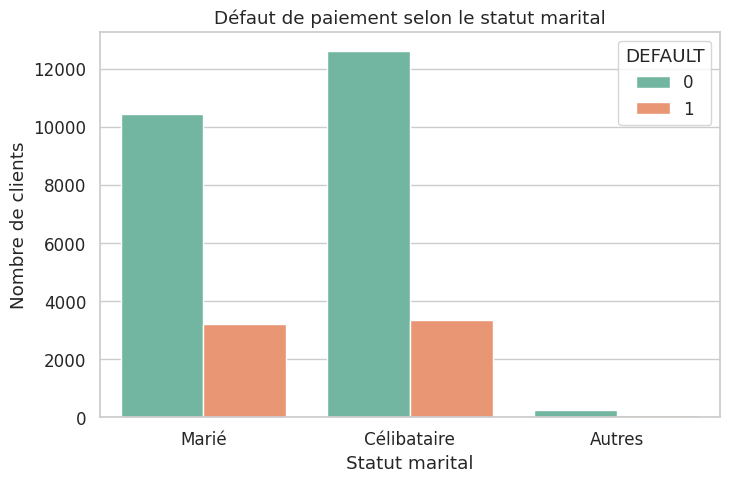

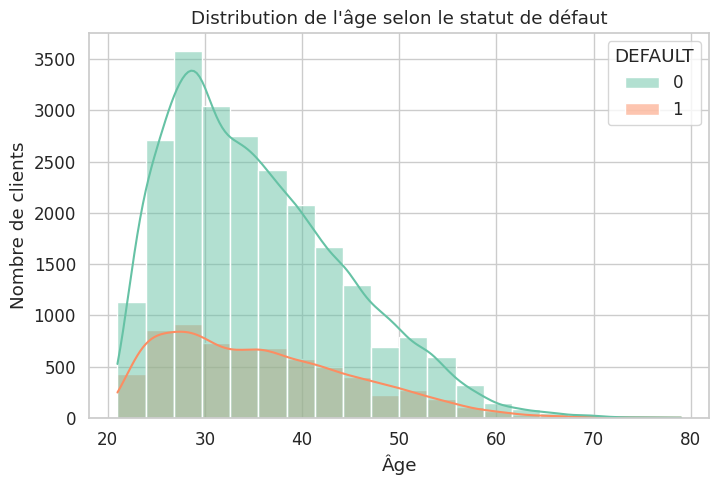

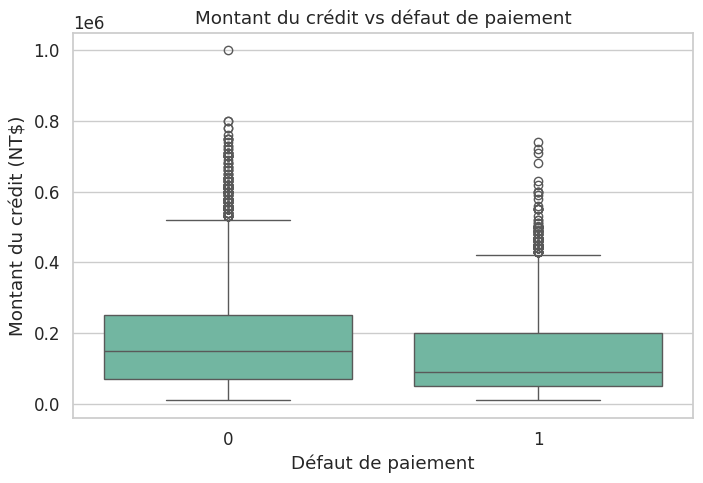

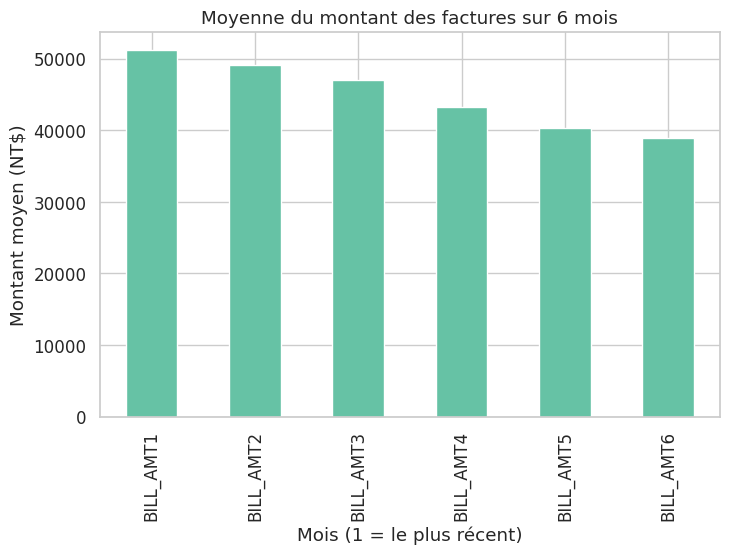

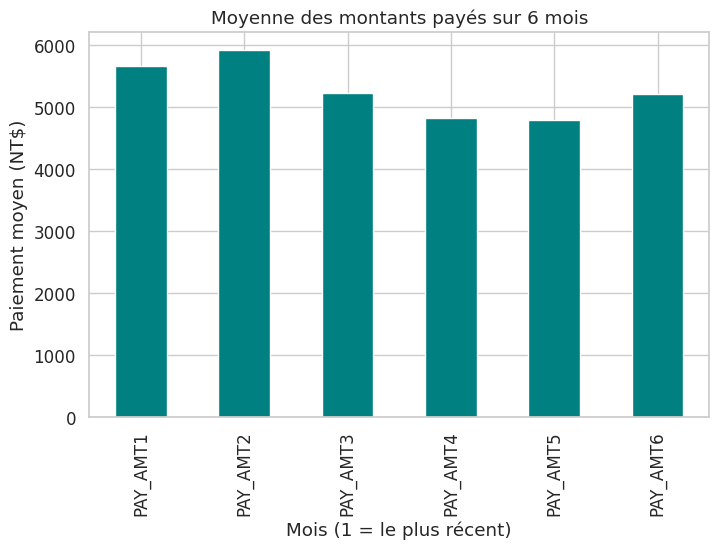

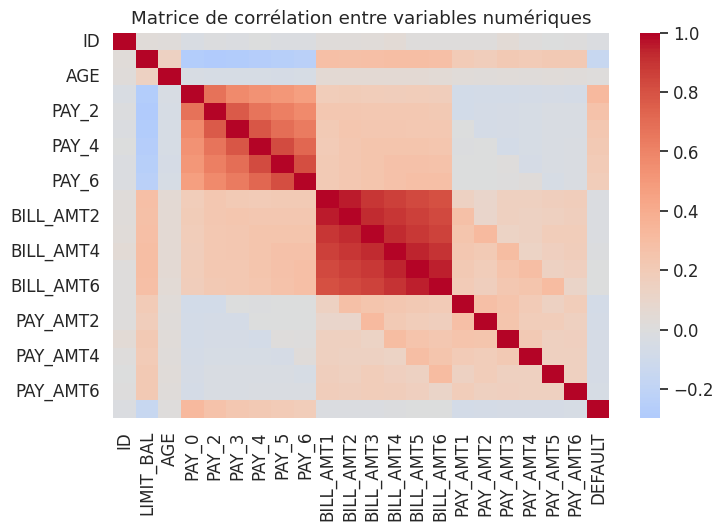

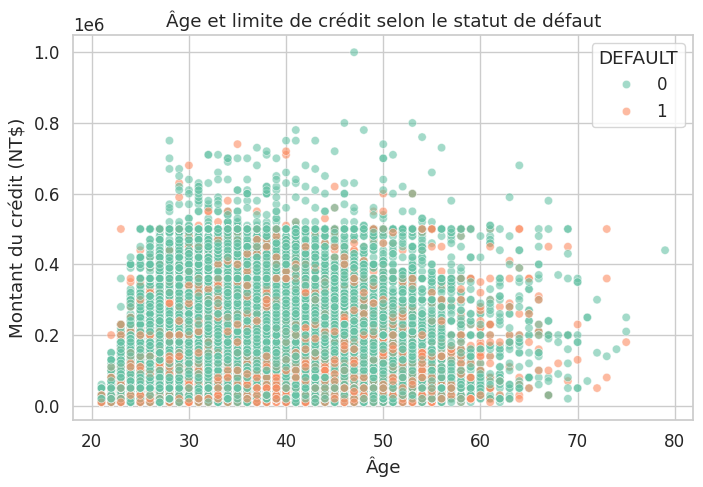


✅ 10 graphiques générés avec succès.


In [10]:
# =====================================================
# ANALYSE VISUELLE DU DATASET : DEFAULT OF CREDIT CARD CLIENTS
# Basé sur l'étude de Yeh & Lien (2009)
# =====================================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Configuration générale ---
sns.set(style="whitegrid", palette="Set2", font_scale=1.1)
plt.rcParams['figure.figsize'] = (8,5)

# --- Chargement du dataset ---
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls"
data = pd.read_excel(url, header=1)
data.rename(columns={"default payment next month": "DEFAULT"}, inplace=True)

print("✅ Données chargées avec succès :", data.shape, "observations\n")

# --- Nettoyage rapide ---
data = data.dropna()
data["SEX"] = data["SEX"].map({1: "Homme", 2: "Femme"})
data["MARRIAGE"] = data["MARRIAGE"].map({1: "Marié", 2: "Célibataire", 3: "Autres"})
data["EDUCATION"] = data["EDUCATION"].replace({0: 4, 5: 4, 6: 4})  # Regrouper "autres"
data["EDUCATION"] = data["EDUCATION"].map({1: "Master/Doctorat", 2: "Université", 3: "Lycée", 4: "Autres"})

# --- Graphique 1 : Répartition du défaut global ---
sns.countplot(x="DEFAULT", data=data)
plt.title("Répartition globale du défaut de paiement")
plt.xlabel("Défaut de paiement (1=Oui, 0=Non)")
plt.ylabel("Nombre de clients")
plt.show()

# --- Graphique 2 : Répartition par sexe ---
sns.countplot(x="SEX", hue="DEFAULT", data=data)
plt.title("Défaut de paiement selon le sexe")
plt.xlabel("Sexe")
plt.ylabel("Nombre de clients")
plt.show()

# --- Graphique 3 : Répartition par éducation ---
sns.countplot(x="EDUCATION", hue="DEFAULT", data=data)
plt.title("Défaut de paiement selon le niveau d'éducation")
plt.xlabel("Niveau d'éducation")
plt.ylabel("Nombre de clients")
plt.xticks(rotation=15)
plt.show()

# --- Graphique 4 : Répartition par statut marital ---
sns.countplot(x="MARRIAGE", hue="DEFAULT", data=data)
plt.title("Défaut de paiement selon le statut marital")
plt.xlabel("Statut marital")
plt.ylabel("Nombre de clients")
plt.show()

# --- Graphique 5 : Distribution de l'âge selon le défaut ---
sns.histplot(data=data, x="AGE", hue="DEFAULT", bins=20, kde=True)
plt.title("Distribution de l'âge selon le statut de défaut")
plt.xlabel("Âge")
plt.ylabel("Nombre de clients")
plt.show()

# --- Graphique 6 : Montant du crédit vs défaut ---
sns.boxplot(x="DEFAULT", y="LIMIT_BAL", data=data)
plt.title("Montant du crédit vs défaut de paiement")
plt.xlabel("Défaut de paiement")
plt.ylabel("Montant du crédit (NT$)")
plt.show()

# --- Graphique 7 : Moyenne des soldes par mois ---
bill_cols = [f"BILL_AMT{i}" for i in range(1,7)]
bill_means = data[bill_cols].mean()
bill_means.plot(kind='bar')
plt.title("Moyenne du montant des factures sur 6 mois")
plt.xlabel("Mois (1 = le plus récent)")
plt.ylabel("Montant moyen (NT$)")
plt.show()

# --- Graphique 8 : Moyenne des paiements par mois ---
pay_cols = [f"PAY_AMT{i}" for i in range(1,7)]
pay_means = data[pay_cols].mean()
pay_means.plot(kind='bar', color='teal')
plt.title("Moyenne des montants payés sur 6 mois")
plt.xlabel("Mois (1 = le plus récent)")
plt.ylabel("Paiement moyen (NT$)")
plt.show()

# --- Graphique 9 : Corrélation entre variables ---
corr = data.corr(numeric_only=True)
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Matrice de corrélation entre variables numériques")
plt.show()

# --- Graphique 10 : Relation limite de crédit / âge / défaut ---
sns.scatterplot(x="AGE", y="LIMIT_BAL", hue="DEFAULT", data=data, alpha=0.6)
plt.title("Âge et limite de crédit selon le statut de défaut")
plt.xlabel("Âge")
plt.ylabel("Montant du crédit (NT$)")
plt.show()

print("\n✅ 10 graphiques générés avec succès.")
